In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.cpm_basic import CellularPottsModel
from scipy.spatial import ConvexHull
import matplotlib.cm as cm
import pickle
from skimage.measure import regionprops, label, perimeter as measure_perimeter
from scipy.ndimage import label as label_scipy
import pandas as pd
from src.util import color_code_cells

In [6]:
n_cells=55
n_types=2 
T=26 
L=150
J = 100
adhessions= np.array([[0, 0.2, 0.2],  
                      [0.2, J, J],
                      [0.2, J, J]]) 
volume_coefficient= np.array([0, 10, 20])
C_p=1
lattice_type="circle"
object_volumes=None # Is default set in the CPM class if none
periodic=False

# Time Development

In [ ]:
EN = []
init = ["circle", "hex"]
for i in range(len(init)):
    if init[i] == "circle":
        lattice_type = "circle"
    else:
        lattice_type = "hex"
    cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, C_p=C_p, volume_coefficient=volume_coefficient,
                             adhessions=adhessions, lattice_type=lattice_type, object_volumes=object_volumes, periodic=periodic)
    energy = cpm.run_time_development_sim(steps=500000, interval=1000)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i, energy in enumerate(EN):
    ax.plot(energy, label=init[i])
    ax.set_xlabel("Time [x1000 MCS]", fontsize=15)
    ax.set_ylabel("Total Energy", fontsize=15)
    ax.legend(fontsize=12)
    ax.grid(linestyle='--', alpha=0.5)
fig.tight_layout()



# Two Cell Exploration

In [7]:
# Set up the Constants and Parameters
J = 100
weak_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                        [0.2, 100, 50],
                                        [0.2, 50, 100]]) 
strong_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                          [0.2, 50, 100],
                                          [0.2, 100, 50]])
same_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                        [0.2, J, J],
                                        [0.2, J, J]])
double_volume_coefficient = np.array([0, 1, 2])
triple_volume_coefficient = np.array([0, 1, 3])
same_volume_coefficient = np.array([0, 1, 1])

adhesion_params = [weak_adhesion_between_types, strong_adhesion_between_types, same_adhesion_between_types]
adhesion_param_names = ['Weak Between Types', 'Strong Between Types', 'Same Between Types']
volume_params = [double_volume_coefficient, triple_volume_coefficient, same_volume_coefficient]
volume_param_names = ['Double Volume Coeff for type 2', 'Triple Volume Coeff for type 2', 'Same Volume Coeff']

In [8]:
GRIDS = []
TYPES = []
for ad_param in adhesion_params:
    row_grids = []
    row_type = []
    for vol_param in volume_params:
        cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, adhessions=ad_param,
                                 volume_coefficient=vol_param, C_p=C_p, lattice_type=lattice_type,
                                 object_volumes=object_volumes, periodic=periodic)
        a=cpm.run_a_sim(steps=250000)
        row_grids.append(a)
        row_type.append(cpm.tau)
    GRIDS.append(row_grids)
    TYPES.append(row_type)

with open('saves/grids_circle_type_variation.pkl', 'wb') as f:
    pickle.dump(GRIDS, f)
with open('saves/types_circle_type_variation.pkl', 'wb') as f:
    pickle.dump(TYPES, f)

 47%|████▋     | 117014/250000 [00:14<00:16, 8110.41it/s]


KeyboardInterrupt: 

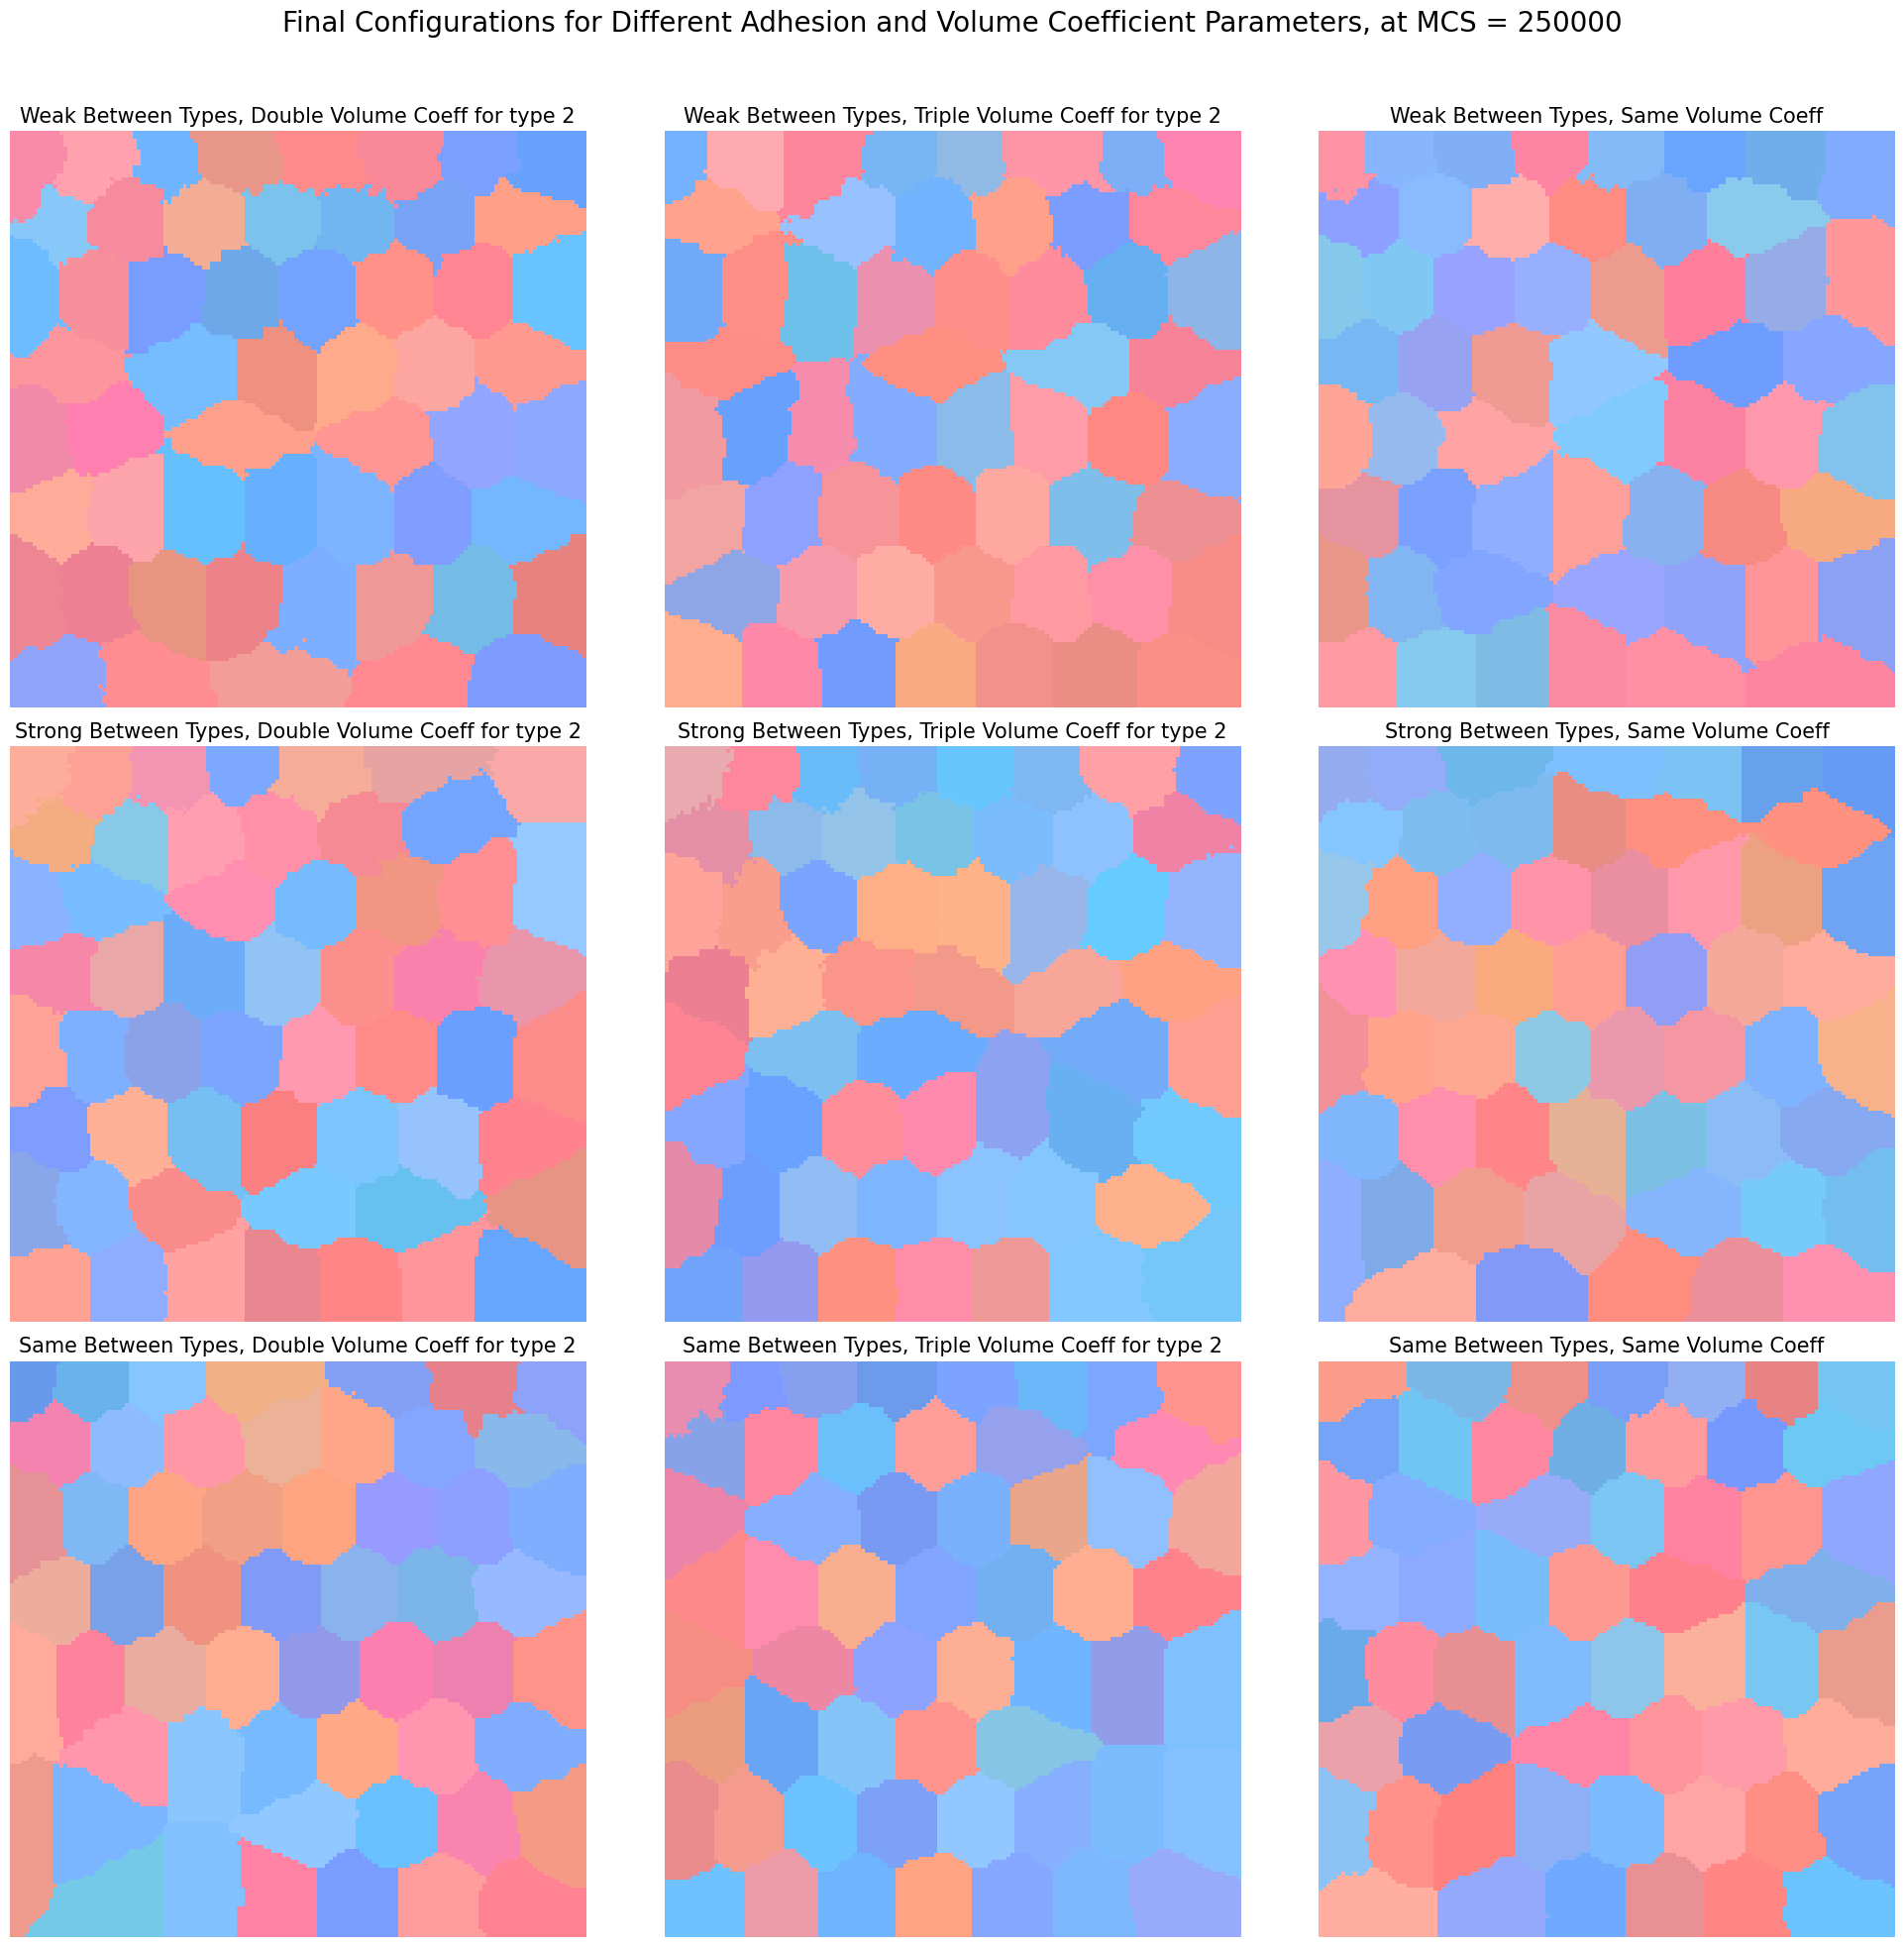

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

for i in range(3):
    for j in range(3):
        colored_grid = color_code_cells(GRIDS[i][j], TYPES[i][j])
        ax[i, j].imshow(colored_grid, cmap='tab20', interpolation='nearest')
        ax[i, j].set_title(f'{adhesion_param_names[i]}, {volume_param_names[j]}', fontsize=15)
        ax[i, j].axis('off')

fig.suptitle("Final Configurations for Different Adhesion and Volume Coefficient Parameters, at MCS = 250000", fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.96])